#**Keystroke Dynamics on Mobile Devices Varying with Time**




###Importing required libraries

In [ ]:
#import required libraries
import os
import pandas as pd
import numpy as np
import datetime
import pickle


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# mounting a specific directory on my google drive for data storage and retrieval
os.chdir("/content/drive/My Drive/Practicum/")
!ls


Mounted at /content/drive
'Colab Notebooks'
 CSV
 db_backups
 Ethics-Notification-Form-Computing-November-2020.docx
'Language Logger -Logging Details.pptx'
'Manual for set up language logger app backend application on windows.gdoc'
 Pickle
 plotly_gantt_chart-main
 reseachIMELogging.html
 reseachIMELogging.mp4
 ResearchIMEKeyboard.apk


In [ ]:
# pickle functions
#for reading pickle file
def read_pickle(filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'rb') as file:
     unpickler = pickle.Unpickler(file)
     df = pickle.load(file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))
  return df
  
#to write into a pickle file
def write_pickle(df,filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'wb') as file:
    pickle.dump(pd.DataFrame(df), file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))


In [ ]:
#retrieve the pickle file 'df_event_new.p' 
df_event_new=read_pickle('df_event_new.p')


Start Pickle Load time: 2021-06-08 14:45:21.304102
End Pickle Load time: 2021-06-08 14:45:22.060135   Duration:0:00:00.756033


In [ ]:
df_event_new.to_csv('/content/drive/My Drive/Practicum/CSV/df_event_new.csv')

In [ ]:
df_event_new.set_index(['event_date'])
#create a dataframe based on date
df_event_day=df_event_new.query('event_date=="2021-02-15"')
#df_event_day=df_event_new.query('user_name=="user5"')
#df_event_day=df_event_new.query('(event_date=="2021-02-15")&(user_uuid=="46952d51-25ad-405a-ac11-a22a624ae6b5")')
#to find unique user_id
#df_event_day.user_uuid.unique()
#to find unique user_name
df_event_day.user_name.unique()


array(['user6', 'user4', 'user2', 'user5', 'user3'], dtype=object)

In [ ]:
df_event_day=df_event_new.query('user_name=="user5"')
df_event_day.shape

(32700, 7)

**Visualisation**

In [ ]:
df_event_hour = pd.DataFrame(df_event_day[['avg_pressure','start_timestamp','user_name']])
df_event_hour['start_hour']= df_event_hour['start_timestamp'].dt.hour
df_event_hour

,avg_pressure,start_timestamp,user_name,start_hour
72483,1.0,2021-02-15 03:33:20,user6,3
72484,1.0,2021-02-15 03:33:20,user6,3
72485,1.0,2021-02-15 03:33:20,user6,3
72486,1.0,2021-02-15 03:33:20,user6,3
72487,1.0,2021-02-15 03:33:20,user6,3
...,...,...,...,...
75118,1.0,2021-02-15 17:26:40,user5,17
75119,1.0,2021-02-15 17:26:40,user5,17
75120,1.0,2021-02-15 17:26:40,user5,17
75121,1.0,2021-02-15 23:00:00,user5,23


In [ ]:
#Aggregate different functions over the columns and rename the index of the resulting DataFrame.
temp_df=df_event_hour.groupby(['user_name','start_hour']).agg(start_timestamp=('start_timestamp',max),avg_pressure=('avg_pressure',np.mean)).reset_index()
#temp_df['avg_pressure']=temp_df['avg_pressure'].round(decimals=3)
temp_df

,user_name,start_hour,start_timestamp,avg_pressure
0,user2,6,2021-02-15 06:20:00,0.046727
1,user2,9,2021-02-15 09:06:40,0.046562
2,user2,11,2021-02-15 11:53:20,0.044059
3,user3,17,2021-02-15 17:26:40,1.000000
4,user4,6,2021-02-15 06:20:00,1.000000
5,user4,9,2021-02-15 09:06:40,1.000000
6,user4,11,2021-02-15 11:53:20,1.000000
7,user5,9,2021-02-15 09:06:40,1.000000
8,user5,11,2021-02-15 11:53:20,1.000000
9,user5,14,2021-02-15 14:40:00,1.000000


In [ ]:
# getting necessary libraries
import plotly.graph_objects as go
import numpy as np
import pandas as pd
# the idea behind this ridgeline plot with Plotly is to add traces manually, each trace corresponding to a particular year's temperature distribution
# thus, we are to store each user's data  in seperate arrays or pd.series that we store in a dictionary to retrieve them easily
array_dict = {} # instantiating an empty dictionnary
for user_name in user_list:
    array_dict[f'x_{user_name}'] = temp[temp['year']==year]['Mean_TemperatureC'] # storing the temperature data for each year
    array_dict[f'y_{user_name}'] = temp[temp['year']==year]['count'] # storing the temperature count for each year
    array_dict[f'y_{user_name}'] = (array_dict[f'y_{year}'] - array_dict[f'y_{year}'].min()) \
                                / (array_dict[f'y_{year}'].max() - array_dict[f'y_{year}'].min()) # we normalize the array (min max normalization)

# once all of this is done, we can create a plotly.graph_objects.Figure and add traces with fig.add_trace() method
# since we have stored the temperatures and their respective count for each year, we can plot scatterplots (go.Scatter)
# we thus iterate over year_list and create a 'blank line' that is placed at y = index, then the corresponding temperature count line
fig = go.Figure()
for index, year in enumerate(year_list):
    fig.add_trace(go.Scatter(
                            x=[-20, 40], y=np.full(2, len(year_list)-index),
                            mode='lines',
                            line_color='white'))
    
    fig.add_trace(go.Scatter(
                            x=array_dict[f'x_{year}'],
                            y=array_dict[f'y_{year}'] + (len(year_list)-index) + 0.4,
                            fill='tonexty',
                            name=f'{year}'))
    
    # plotly.graph_objects' way of adding text to a figure
    fig.add_annotation(
                        x=-20,
                        y=len(year_list)-index,
                        text=f'{year}',
                        showarrow=False,
                        yshift=10)

# here you can modify the figure and the legend titles
fig.update_layout(
                title='Average temperature from 1950 until 2010 in Seattle',
                showlegend=False,
                xaxis=dict(title='Temperature in degree Celsius'),
                yaxis=dict(showticklabels=False) # that way you hide the y axis ticks labels
                )

fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has

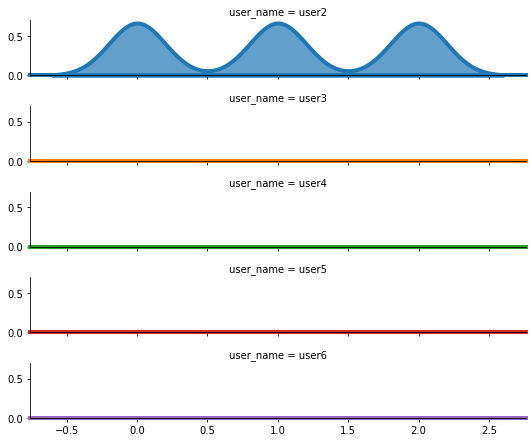

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
df=df_event_hour_new.dropna()
le = preprocessing.LabelEncoder()
df["avg_pressure"] = le.fit_transform(df["avg_pressure"])  
rp = sns.FacetGrid(df, row="user_name", hue="user_name", aspect=6, height=1.25)
rp.map(sns.kdeplot, 'avg_pressure', clip_on=False,shade=True, alpha=0.7, lw=4, bw=.2)
rp.map(plt.axhline, y=0, lw=4, clip_on=False)

In [ ]:
!pip install plotly==4.14.3.
!pip install chart_studio

     |████████████████████████████████| 13.2MB 282kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 71kB 2.2MB/s 


In [ ]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls
gannt_df = pd.DataFrame(df_event_day[['avg_pressure','start_timestamp','end_timestamp','user_name']])
gannt_df['avg_pressure'].round(decimals=2)
#gannt_df.rename(columns = {'avg_pressure' :'Task','start_timestamp' :'Start','end_timestamp' :'Finish','user_name' :'Resource'}, inplace = True)
gannt_df.rename(columns = {'user_name' :'Task','start_timestamp' :'Start','end_timestamp' :'Finish','avg_pressure' :'Resource'}, inplace = True)


colors = { 'user1' : 'rgb(102, 153, 0)'
          , 'user2' : 'rgb(0, 204, 255)'
          , 'user3' : 'rgb(0, 51, 153)'
          , 'user4' : 'rgb(102, 0, 204)'
          , 'user5' : 'rgb(204, 0, 255)'
          , 'user6' : 'rgb(255, 0, 204)'
          , 'user7' : 'rgb(255, 0, 102)'
          , 'user8' : 'rgb(51, 255, 255)'}

orders = list(gannt_df['Resource'])
fig = px.timeline(gannt_df
                  , x_start="Start"
                  , x_end="Finish"
                  , y="Task"
                  , hover_name="Resource"
                  #,facet_row="Resource"
                  #, facet_col_wrap=40
                  , facet_col_spacing=.99
#                  , color_discrete_sequence=['green']*len(gannt_df)
                  , color_discrete_sequence=px.colors.qualitative.Prism
#                  , opacity=.7
                   , text="Task"
                  , range_x=None
                  , range_y=None
                  , template='plotly_white'
                  , height=500
                  , width=500
                 , color='Task'
                  , title ="<b> Key Stroke Analysis </b>"
#                  , color=colors
                 )
fig.update_layout(
    bargap=0.5
    ,bargroupgap=0.1
    ,xaxis_range=[gannt_df.Start.min(), gannt_df.Finish.max()]
    ,xaxis = dict(
        showgrid=True
        ,rangeslider_visible=True
        ,side ="top"
        ,tickmode = 'array'
        ,dtick="M1"
        ,tickformat="Q%q %Y \n"
        ,ticklabelmode="period"        
        ,ticks="outside"
        ,tickson="boundaries"
        ,tickwidth=.1
        ,layer='below traces'
        ,ticklen=20
        ,tickfont=dict(
            family='Old Standard TT, serif',size=24,color='gray')
        ,rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
            ,x=.37
            ,y=-.05
            ,font=dict(
                family="Arial",
                size=14,
                color="Green"
    )))
    
    ,yaxis = dict(
        title= "Users"
        ,autorange="reversed"
        ,automargin=True
#         ,anchor="free"
        ,ticklen=10
        ,showgrid=True
        ,showticklabels=True
        ,tickfont=dict(
            family='Old Standard TT, serif', size=16, color='gray'))
    
    ,legend=dict(
        orientation="h"
        ,yanchor="bottom"
        ,y=1.1
        ,title="Key Stroke Analysis"
        ,xanchor="right"
        ,x=1
        ,font=dict(
            family="Arial"
            ,size=14
            ,color="darkgray"))
)
fig.update_traces( #marker_color='rgb(158,202,225)'
                   marker_line_color='rgb(8,48,107)'
                  , marker_line_width=1.5, opacity=0.95)
fig.update_layout(
    
    #xaxis_title="Time",
     margin_l=400,
    yaxis_title="Pressure",
    #legend_title="Dimension: ",
    font=dict(
        family="Arial",
        size=20,
        color="darkgray"
    )
)
fig.show()

In [ ]:
import plotly.figure_factory as ff
gannt_df = df_event_day[['avg_pressure','start_timestamp','end_timestamp','user_name']]
gannt_df.rename(columns = {'avg_pressure' :'Task','start_timestamp' :'Start','end_timestamp' :'Finish','user_name' :'Resource'}, inplace = True)
colors = { 'user1' : 'rgb(102, 153, 0)'
          , 'user2' : 'rgb(0, 204, 255)'
          , 'user3' : 'rgb(0, 51, 153)'
          , 'user4' : 'rgb(102, 0, 204)'
          , 'user5' : 'rgb(204, 0, 255)'
          , 'user6' : 'rgb(255, 0, 204)'
          , 'user7' : 'rgb(255, 0, 102)'
          , 'user8' : 'rgb(51, 255, 255)'}

fig = ff.create_gantt(gannt_df, colors=colors, index_col='Resource', show_colorbar=True,group_tasks=True)
fig.show()




In [ ]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls
gannt_df = pd.DataFrame(df_event_day[['avg_pressure','start_timestamp','end_timestamp','user_name']])
gannt_df.rename(columns = {'user_name' :'Task','start_timestamp' :'Start','end_timestamp' :'Finish','avg_pressure' :'Resource'}, inplace = True)
colors = { 'user1' : 'rgb(102, 153, 0)'
          , 'user2' : 'rgb(0, 204, 255)'
          , 'user3' : 'rgb(0, 51, 153)'
          , 'user4' : 'rgb(102, 0, 204)'
          , 'user5' : 'rgb(204, 0, 255)'
          , 'user6' : 'rgb(255, 0, 204)'
          , 'user7' : 'rgb(255, 0, 102)'
          , 'user8' : 'rgb(51, 255, 255)'}

orders = list(gannt_df['Task'])
fig = px.timeline(gannt_df
                  , x_start="Start"
                  , x_end="Finish"
                  , y="Task"
                  , hover_name="Resource"
#                  , y="Task"
#                  , hover_name="Resource"
#                   , facet_row="Resource"
#                   , facet_col_wrap=40
#                   , facet_col_spacing=.99
#                  , color_discrete_sequence=['green']*len(gannt_df)
                  , color_discrete_sequence=px.colors.qualitative.Prism
#                  , opacity=.7
                   , text="Task"
                  , range_x=None
                  , range_y=None
                  , template='plotly_white'
                  , height=500
                  , width=500
#                  , color='Task'
                  , title ="<b> Key Stroke Analysis </b>"
#                  , color=colors
                 )
fig.update_layout(
    bargap=0.5
    ,bargroupgap=0.1
    ,xaxis_range=[gannt_df.Start.min(), gannt_df.Finish.max()]
    ,xaxis = dict(
        showgrid=True
        ,rangeslider_visible=True
        ,side ="top"
        ,tickmode = 'array'
        ,dtick="M1"
        ,tickformat="Q%q %Y \n"
        ,ticklabelmode="period"        
        ,ticks="outside"
        ,tickson="boundaries"
        ,tickwidth=.1
        ,layer='below traces'
        ,ticklen=20
        ,tickfont=dict(
            family='Old Standard TT, serif',size=24,color='gray')
        ,rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
            ,x=.37
            ,y=-.05
            ,font=dict(
                family="Arial",
                size=14,
                color="Green"
    )))
    
    ,yaxis = dict(
        title= "Users"
        ,autorange="reversed"
        ,automargin=True
#         ,anchor="free"
        ,ticklen=10
        ,showgrid=True
        ,showticklabels=True
        ,tickfont=dict(
            family='Old Standard TT, serif', size=16, color='gray'))
    
    ,legend=dict(
        orientation="h"
        ,yanchor="bottom"
        ,y=1.1
        ,title="Key Stroke Analysis"
        ,xanchor="right"
        ,x=1
        ,font=dict(
            family="Arial"
            ,size=14
            ,color="darkgray"))
)
fig.update_traces( #marker_color='rgb(158,202,225)'
                   marker_line_color='rgb(8,48,107)'
                  , marker_line_width=1.5, opacity=0.95)
fig.update_layout(
    title="<b> Gantt Chart </b>",
    xaxis_title="Time",
#     margin_l=400,
    yaxis_title="Pressure",
#     legend_title="Dimension: ",
    font=dict(
        family="Arial",
        size=24,
        color="darkgray"
    )
)
fig.show()